<a href="https://colab.research.google.com/github/edaaa/demo/blob/master/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             sales
date              
2009-10-01  338630
        date   sales
0 2009-10-01  338630
1 2009-11-01  339386
2 2009-12-01  400264
3 2010-01-01  314640
4 2010-02-01  311022
           ds          y
67 2015-05-01  13.044650
68 2015-06-01  13.013060
69 2015-07-01  13.033991
70 2015-08-01  13.030993
71 2015-09-01  12.973671
           ds      trend  ...  multiplicative_terms_upper       yhat
91 2017-04-30  13.041237  ...                         0.0  13.059601
92 2017-05-31  13.042942  ...                         0.0  13.055874
93 2017-06-30  13.044592  ...                         0.0  13.076325
94 2017-07-31  13.046298  ...                         0.0  13.056053
95 2017-08-31  13.048003  ...                         0.0  13.027370

[5 rows x 16 columns]
               sales       yhat  yhat_lower  yhat_upper
2009-10-01  338630.0  12.728916   12.719169   12.739480
2009-11-01  339386.0  12.749435   12.738056   12.759749
2009-12-01  400264.0  12.887444   12.877244   12.897041
2010-0

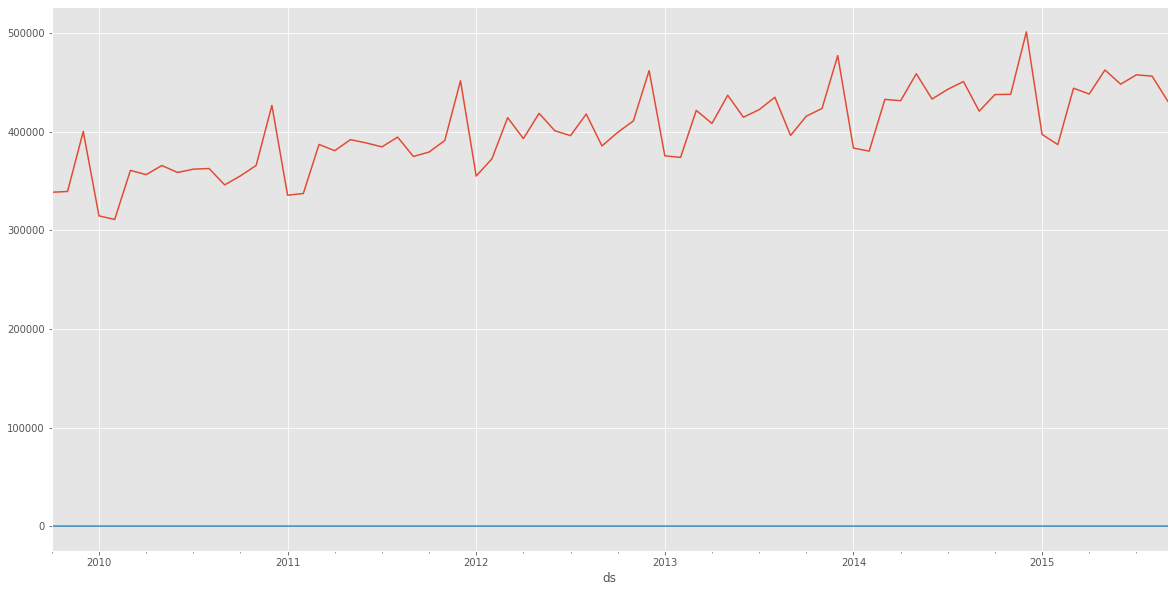

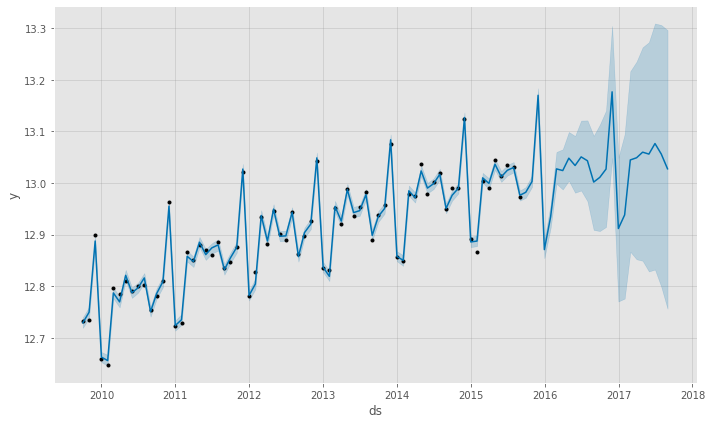

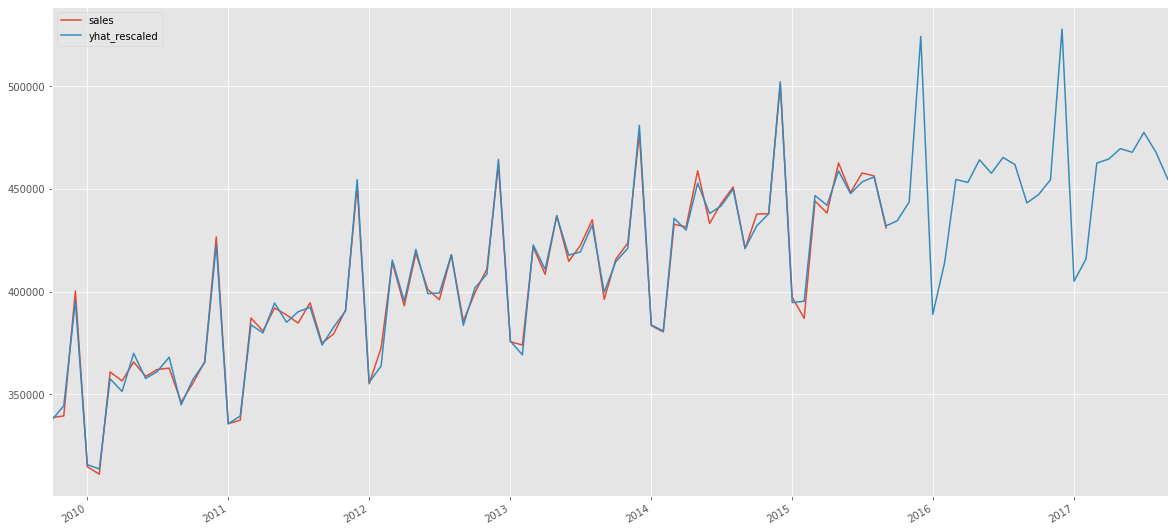

In [15]:
import pandas as pd
import numpy as np

from fbprophet import Prophet
import matplotlib.pyplot as plt

# %matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()
sales_df = pd.read_csv("retail_sales.csv", index_col='date', parse_dates=True)
print(sales_df.head(1))
df = sales_df.reset_index()
print(df.head())
df=df.rename(columns={'date':'ds', 'sales':'y'})
df.head()
df.set_index('ds').y.plot()

df['y'] = np.log(df['y'])
print(df.tail())
df.set_index('ds').y.plot().get_figure()
model = Prophet()
model.fit(df);
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()
forecast = model.predict(future)
print(forecast.tail())
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
model.plot(forecast);
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)
viz_df = sales_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
print(viz_df.head())
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])
print(viz_df.head())
viz_df[['sales', 'yhat_rescaled']].plot()
sales_df.index = pd.to_datetime(sales_df.index) #make sure our index as a datetime object
connect_date = sales_df.index[-2]
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]
print(predict_df.head())